### Tratamento de Dados e Análise Estatística

In [2]:
# bibliotecas utilizadas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.ticker import FuncFormatter

In [3]:
# Carregando o dataset
dataset = pd.read_csv('gcar_data.csv')

In [4]:
for column in dataset.columns:
    try:
        # Tenta converter os valores da coluna para numérico
        pd.to_numeric(dataset[column])
        # Se a conversão for bem-sucedida, a coluna é do tipo Integer ou Float
        print("Coluna '{}' do tipo de dados: Inteiro ou Ponto Flutuante".format(column))
    except ValueError:
        # Se a conversão falhar, significa que a coluna contém texto ou caracteres
        print("Coluna '{}' do tipo de dados: Texto ou Varchar".format(column))

Coluna 'brand' do tipo de dados: Texto ou Varchar
Coluna 'model' do tipo de dados: Texto ou Varchar
Coluna 'color' do tipo de dados: Texto ou Varchar
Coluna 'registration_date' do tipo de dados: Texto ou Varchar
Coluna 'year' do tipo de dados: Texto ou Varchar
Coluna 'price_in_euro' do tipo de dados: Texto ou Varchar
Coluna 'power_kw' do tipo de dados: Texto ou Varchar
Coluna 'power_ps' do tipo de dados: Texto ou Varchar
Coluna 'transmission_type' do tipo de dados: Texto ou Varchar
Coluna 'fuel_type' do tipo de dados: Texto ou Varchar
Coluna 'fuel_consumption_l_100km' do tipo de dados: Texto ou Varchar
Coluna 'fuel_consumption_g_km' do tipo de dados: Texto ou Varchar
Coluna 'mileage_in_km' do tipo de dados: Inteiro ou Ponto Flutuante


In [6]:
# Verificando quantidade de registros e variáveis
print("Quantidade de registros:", dataset.shape[0])
print("Quantidade de variáveis:", dataset.shape[1])

Quantidade de registros: 88584
Quantidade de variáveis: 13


In [7]:
# Identificando tipos de variáveis
print("\nTipos de variáveis:")
print(dataset.dtypes)


Tipos de variáveis:
brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
dtype: object


In [9]:
# Resumo estatístico básico
print("\nResumo estatístico:")
print(dataset.describe())


Resumo estatístico:
       mileage_in_km
count   8.858400e+04
mean    8.854514e+04
std     7.999647e+04
min     0.000000e+00
25%     2.800000e+04
50%     7.190000e+04
75%     1.320000e+05
max     3.800000e+06


In [8]:
# Verificando valores ausentes
print("\nValores ausentes:")
print(dataset.isnull().sum())


Valores ausentes:
brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
dtype: int64


In [10]:
# Visualização de algumas entradas do dataset
print("\nAmostra do dataset:")
print(dataset.head())


Amostra do dataset:
     brand         model  color registration_date  year price_in_euro  \
0     ford     Ford Kuga  black           05/2023  2023         38490   
1  hyundai   Hyundai i10  black           09/2018  2018         11555   
3    honda    Honda CR-V    red           07/2018  2018         24490   
4      kia  Kia Sportage  black           02/2023  2023         34990   
5    honda   Honda Civic  black           09/2009  2009          5800   

  power_kw power_ps transmission_type fuel_type fuel_consumption_l_100km  \
0      140      190         Automatic    Hybrid             5,4 l/100 km   
1       49       67            Manual    Petrol             4,6 l/100 km   
3      114      155         Automatic    Petrol             7,5 l/100 km   
4      110      150            Manual    Petrol             5,9 l/100 km   
5      103      140            Manual    Petrol             6,7 l/100 km   

  fuel_consumption_g_km  mileage_in_km  
0              124 g/km          100.0  
1

In [13]:
# Selecionando as linhas onde o valor da coluna 'fuel_consumption_l_100km' é nulo
linhas_faltantes = dataset[dataset['fuel_consumption_l_100km'].isnull()]

# Contando os valores únicos na coluna 'fuel_type' do DataFrame resultante
# Isso nos dá a contagem de valores ausentes em 'fuel_type' para as linhas com 'fuel_consumption_l_100km' nulo
contagem_por_tipo_combustivel = linhas_faltantes['fuel_type'].value_counts()

# Exibindo a contagem de valores ausentes por tipo de combustível
print(contagem_por_tipo_combustivel)

fuel_type
Petrol        300
Electric      201
Hybrid        144
CNG            46
LPG            22
Hydrogen       15
10/2022         2
12/2019         2
03/2017         2
06/2014         1
03/2014         1
07/2004         1
Manual          1
05/2015         1
07/2007         1
12/2016         1
04/2022         1
02/2017         1
Diesel          1
08/2018         1
180.000 km      1
12/2012         1
08/2014         1
03/2018         1
11/2021         1
03/2019         1
04/2013         1
264.000 km      1
05/2009         1
06/2004         1
12/2014         1
01/2016         1
04/2008         1
09/2009         1
Name: count, dtype: int64


In [14]:
# Contagem de carros por cor
contagem_cor = dataset['color'].value_counts()

# Exibir a contagem de carros por cor de maneira tabular
print("Cor           Quantidade")
print("------------------------")
for cor, quantidade in contagem_cor.items():
    print(f"{cor.ljust(12)} {quantidade}")

Cor           Quantidade
------------------------
black        21641
grey         17494
white        14987
blue         11131
silver       10566
red          7147
brown        1583
green        1199
orange       1019
yellow       715
beige        646
gold         156
bronze       141
violet       116


In [16]:
# Contagem de ocorrências de cada marca
brand_counts = dataset['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'Count']
print("Contagem de ocorrências de cada marca:")
print(brand_counts)

Contagem de ocorrências de cada marca:
           brand  Count
0           audi  19474
1            bmw  17850
2           ford  16773
3        hyundai   5857
4            kia   5073
5           fiat   4364
6        citroen   3451
7          dacia   3022
8     land-rover   2757
9          mazda   2054
10          jeep   1574
11    alfa-romeo   1341
12        jaguar   1205
13         honda    675
14      maserati    581
15       bentley    400
16       ferrari    326
17         dodge    281
18   lamborghini    278
19  aston-martin    221
20      daihatsu    181
21          lada    163
22         isuzu    156
23      cadillac    119
24     chevrolet    113
25        lancia     96
26      infiniti     86
27        daewoo     52
28      chrysler     18


In [5]:
# Retirando dados nulos
dataset.dropna(inplace=True)
dataset.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0
5,honda,Honda Civic,black,09/2009,2009,5800,103,140,Manual,Petrol,"6,7 l/100 km",155 g/km,160000.0


In [11]:
# Removendo linhas com tipos de combustível 'Unknown' e 'Other'
dataset = dataset[(dataset['fuel_type'] != 'Unknown') & (dataset['fuel_type'] != 'Other')]

# Removendo linhas com valores nulos
dataset.dropna(inplace=True)

# Exibindo as primeiras linhas após as modificações
dataset.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0
5,honda,Honda Civic,black,09/2009,2009,5800,103,140,Manual,Petrol,"6,7 l/100 km",155 g/km,160000.0


In [12]:
# Definindo uma função para converter os valores para o formato numérico
def convert_to_numerical(value):
    if isinstance(value, float):
        return value
    elif 'l/100 km' in value:
        value = value.replace(' l/100 km', '').replace(',', '.')
        try:
            return float(value)
        except ValueError:
            return None
    else:
        return None

# Aplicando a função à coluna 'fuel_consumption_l_100km'
dataset['fuel_consumption_l_100km'] = dataset['fuel_consumption_l_100km'].apply(lambda x: convert_to_numerical(x))

# Exibindo as primeiras linhas após a conversão e remoção da coluna
dataset.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,5.4,124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,4.6,106 g/km,27782.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,7.5,175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,5.9,150 g/km,7500.0
5,honda,Honda Civic,black,09/2009,2009,5800,103,140,Manual,Petrol,6.7,155 g/km,160000.0


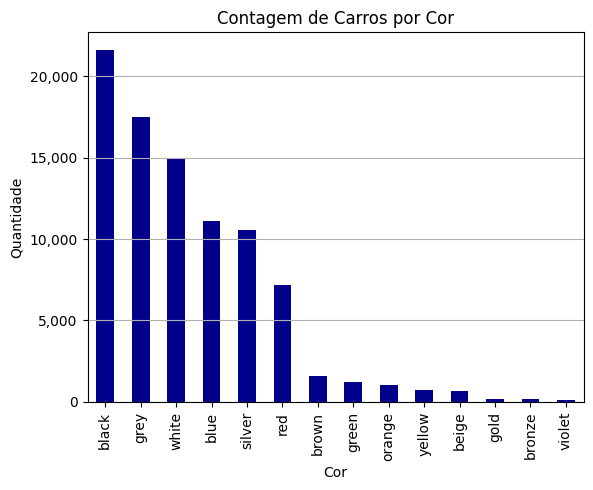

In [15]:
# Gráfico de barras da contagem de cores de carros
contagem_cor = dataset['color'].value_counts()
contagem_cor.plot(kind='bar', color='darkblue')
plt.title('Contagem de Carros por Cor')
plt.xlabel('Cor')
plt.ylabel('Quantidade')

# Configurando a grade para mostrar apenas linhas horizontais
plt.grid(axis='y')

# Adicionando um "." nos números de quantidade de vezes
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Exibindo o gráfico
plt.show()

C:\Users\BIBOY\AppData\Local\Temp\ipykernel_4940\2485456203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='brand', palette='Blues', order=brand_counts.index)


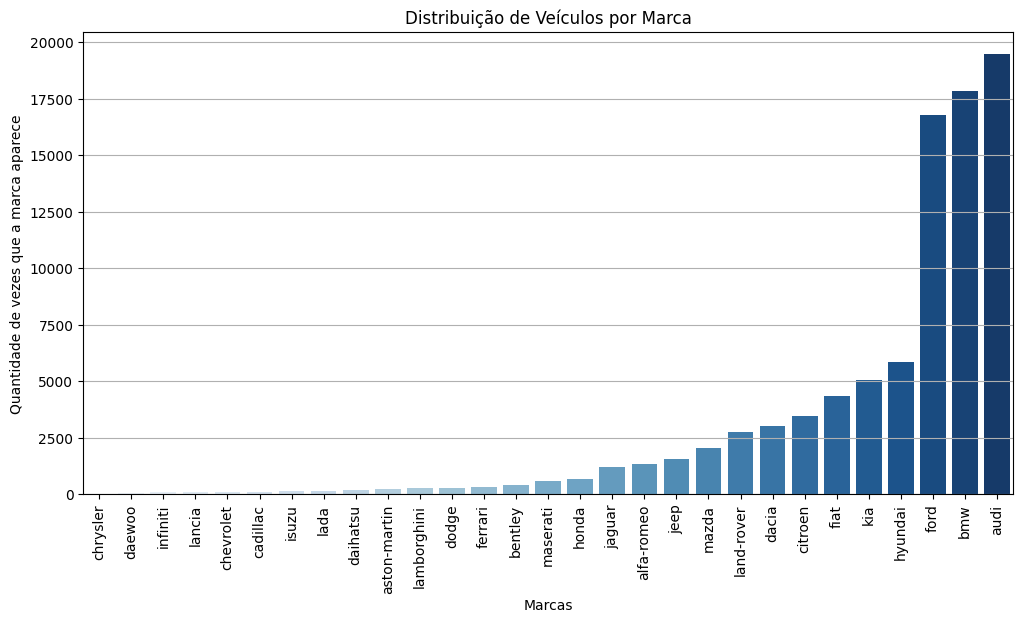

In [17]:
# Calcular a contagem de veículos por marca
brand_counts = dataset['brand'].value_counts().sort_values()

# Gráfico de barras da distribuição de veículos por marcas
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='brand', palette='Blues', order=brand_counts.index)
plt.title('Distribuição de Veículos por Marca')
plt.xlabel('Marcas')
plt.ylabel('Quantidade de vezes que a marca aparece')
plt.xticks(rotation=90)

# Configurando a grade para mostrar apenas linhas horizontais
plt.grid(axis='y')
plt.show()

In [18]:
# Filtrar o dataframe para incluir apenas os registros com valores numéricos na coluna 'year'
dataset_filtered = dataset[dataset['year'].str.isnumeric()]

# Converter a coluna 'year' para int
dataset_filtered['year'] = dataset_filtered['year'].astype(int)

# Filtrar o dataframe para incluir apenas os registros até o ano de 2023
dataset_filtered = dataset_filtered[dataset_filtered['year'] <= 2023].copy()

# Contagem de registros para cada ano de fabricação
year_counts = dataset_filtered['year'].value_counts().reset_index()
year_counts.columns = ['year', 'Count']
year_counts = year_counts.sort_values(by='year')

print("Contagem de registros para cada ano de fabricação:")
print(year_counts)

Contagem de registros para cada ano de fabricação:
    year  Count
28  1995     11
27  1996     30
26  1997     88
25  1998    133
24  1999    212
23  2000    268
22  2001    341
21  2002    427
20  2003    625
19  2004    857
18  2005   1034
17  2006   1339
16  2007   1383
15  2008   1670
13  2009   2282
14  2010   2194
12  2011   2916
11  2012   3103
10  2013   3346
9   2014   4245
7   2015   4973
4   2016   6187
3   2017   7164
1   2018   8834
0   2019  10411
6   2020   6085
8   2021   4380
5   2022   6129
2   2023   7844


C:\Users\BIBOY\AppData\Local\Temp\ipykernel_4940\1756646970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['year'] = dataset_filtered['year'].astype(int)


C:\Users\BIBOY\AppData\Local\Temp\ipykernel_4940\1295506336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['year'] = pd.to_numeric(dataset_filtered['year'])


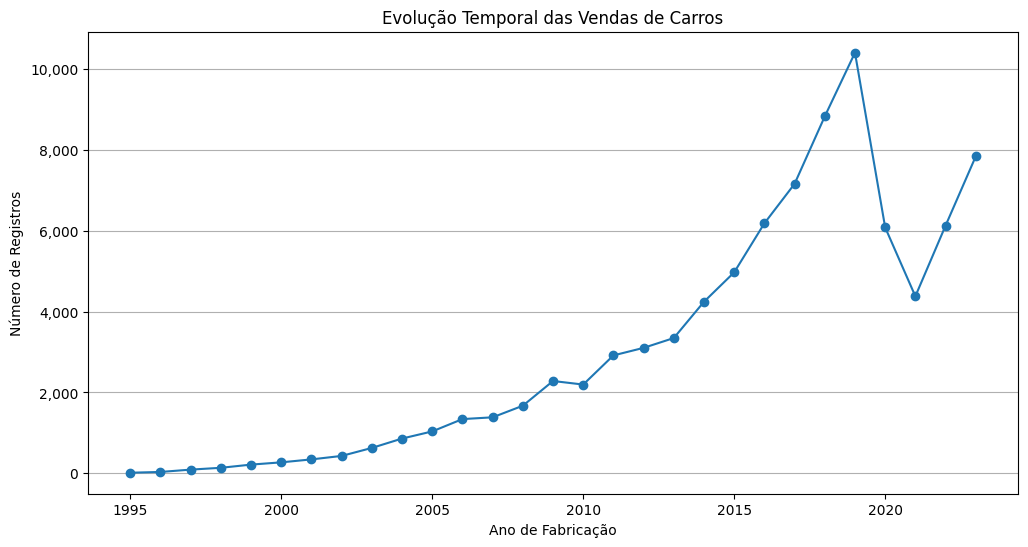

In [19]:
# Filtrando o dataframe para incluir apenas os registros com valores numéricos na coluna 'year'
dataset_filtered = dataset[dataset['year'].str.isnumeric()]

# Convertendo a coluna 'year' para tipo numérico (float)
dataset_filtered['year'] = pd.to_numeric(dataset_filtered['year'])

# Filtrando o dataframe para incluir apenas os registros até o ano de 2023
dataset_filtered = dataset_filtered[dataset_filtered['year'] <= 2023]

# Gráfico de linha da quantidade de registros por ano de fabricação
plt.figure(figsize=(12, 6))
dataset_filtered['year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Evolução Temporal das Vendas de Carros')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Número de Registros')

# Adicionando um "." nos números de quantidade de vezes
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Configurando a grade para mostrar apenas linhas horizontais
plt.grid(axis='y')
plt.show()

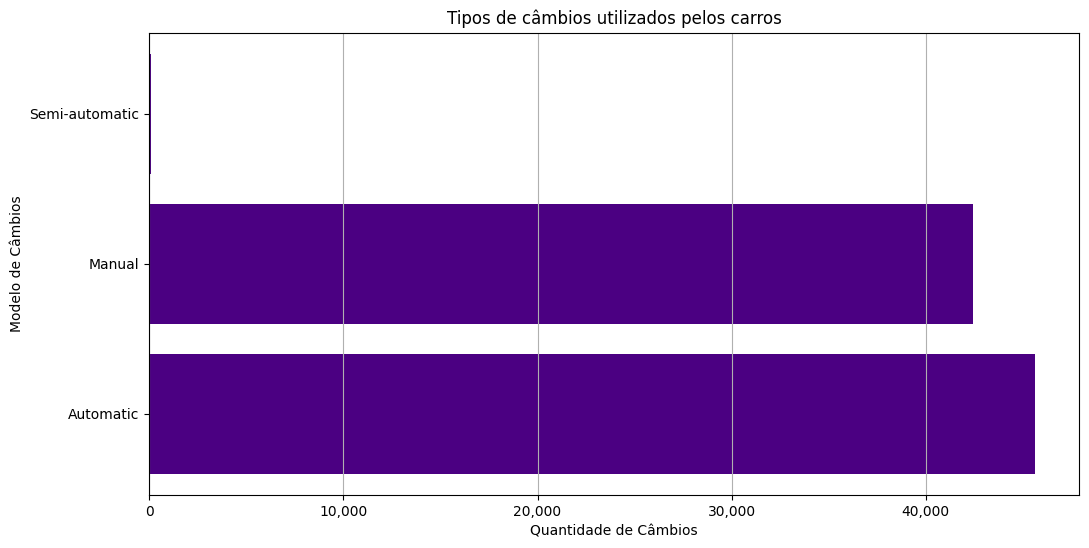

In [20]:
# Removendo linha com tipo de câmbio 'Unknown'
dataset = dataset[(dataset['transmission_type'] != 'Unknown')]

# Contagem de ocorrências de cada tipo de câmbio
transmission_counts = dataset['transmission_type'].value_counts()

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(12, 6))
plt.barh(transmission_counts.index, transmission_counts.values, color='indigo')
plt.title('Tipos de câmbios utilizados pelos carros')
plt.xlabel('Quantidade de Câmbios')
plt.ylabel('Modelo de Câmbios')

# Adicionando um "." nos números de quantidade de câmbios
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(axis='x')  # Configurar a grade para mostrar apenas linhas horizontais
plt.show()

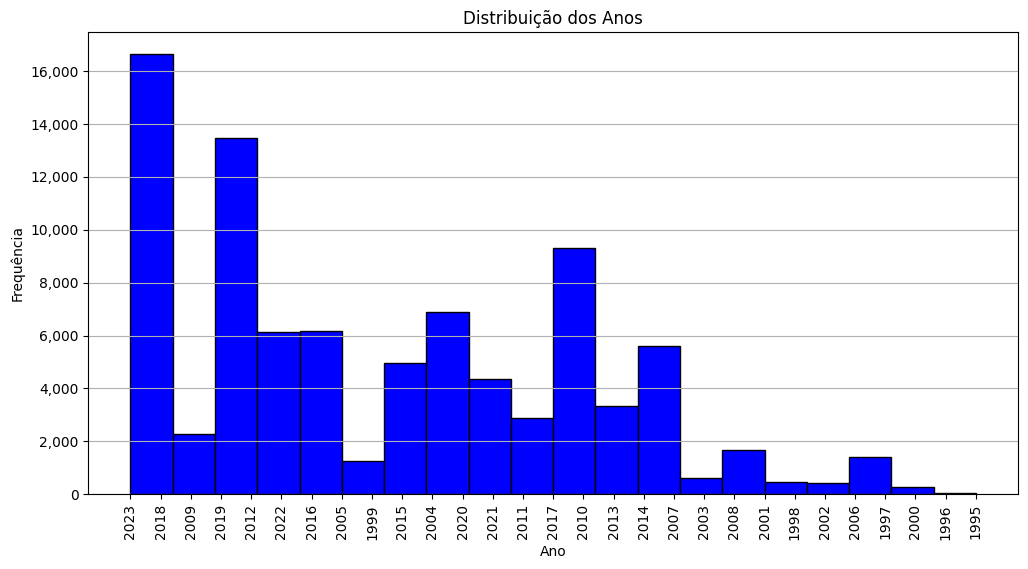

In [21]:
# Excluindo 'petrol', 'diesel', 'manual', 'hybrid', '04/2006' e 'LPG' do dataset antes de plotar o histograma
filtered_years = dataset[~dataset['year'].isin(['Petrol', 'Diesel', 'Manual', 'Hybrid', '04/2006', 'LPG'])]

# Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

# Criando um histograma da distribuição dos anos, com 20 bins
plt.hist(filtered_years['year'], bins=20, color='blue', edgecolor='black')

# Definindo rótulos e título
plt.xlabel('Ano')  # Rótulo do eixo x
plt.ylabel('Frequência')  # Rótulo do eixo y
plt.title('Distribuição dos Anos')  # Título do gráfico

# Rotacionando os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=90)

# Adicionando um "." nos números de quantidade de vezes
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Configurando a grade para mostrar apenas linhas horizontais
plt.grid(axis='y')

# Exibindo o gráfico
plt.show()

### Análise Exploratória

In [22]:
# Convertendo as colunas para os tipos de dados adequados
dataset['registration_date'] = pd.to_datetime(dataset['registration_date'], errors='coerce')
dataset['year'] = pd.to_numeric(dataset['year'], errors='coerce')
dataset['price_in_euro'] = pd.to_numeric(dataset['price_in_euro'], errors='coerce')
dataset['power_kw'] = pd.to_numeric(dataset['power_kw'], errors='coerce')
dataset['power_ps'] = pd.to_numeric(dataset['power_ps'], errors='coerce')
dataset['fuel_consumption_l_100km'] = pd.to_numeric(dataset['fuel_consumption_l_100km'], errors='coerce')
dataset['fuel_consumption_g_km'] = pd.to_numeric(dataset['fuel_consumption_g_km'], errors='coerce')

C:\Users\BIBOY\AppData\Local\Temp\ipykernel_4940\3811813954.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['registration_date'] = pd.to_datetime(dataset['registration_date'], errors='coerce')


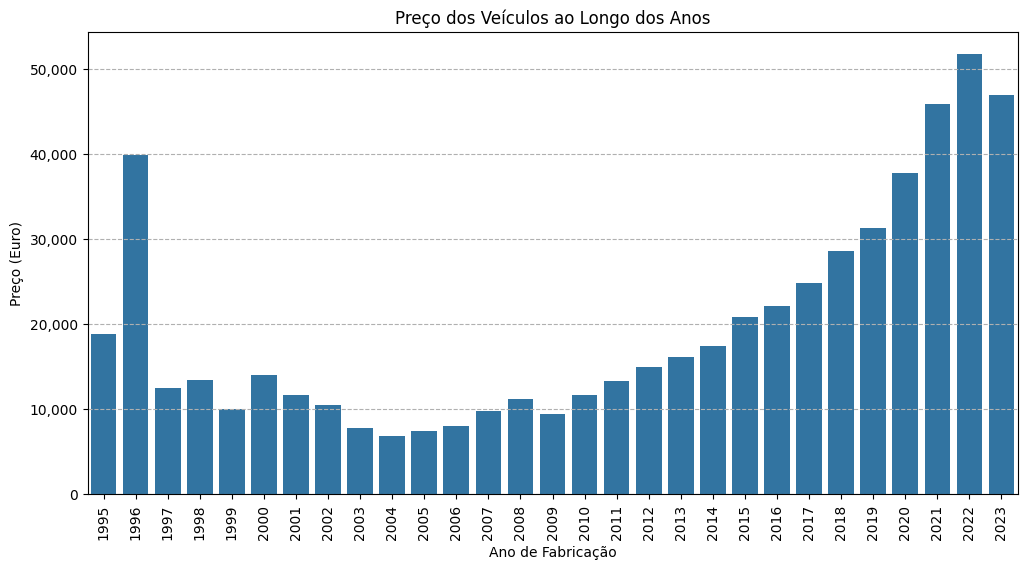

In [23]:
# Remover linhas com valores ausentes na coluna 'year'
dataset = dataset[dataset['year'].notna()]

# Filtrar o dataset para incluir apenas os anos de 1995 a 2023
# Convertendo as colunas do ano para inteiros antes da comparação
filtered_dataset = dataset[(dataset['year'].astype(int) >= 1995) & (dataset['year'].astype(int) <= 2023)]

# Ordenar o dataset pelo ano de fabricação em ordem crescente
filtered_dataset = filtered_dataset.sort_values(by='year')

# Criando o gráfico de barras do preço dos veículos por ano
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_dataset['year'].astype(int), y='price_in_euro', data=filtered_dataset, errorbar=None)  # Remover o intervalo de confiança (errorbar=None)
plt.title('Preço dos Veículos ao Longo dos Anos')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço (Euro)')
plt.xticks(rotation=90)

# Adicionando um "." nos números de quantidade de vezes
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Configurando a grade para mostrar apenas linhas verticais
plt.grid(axis='y', linestyle='--')  # Configurar o estilo da linha como tracejado
plt.show()

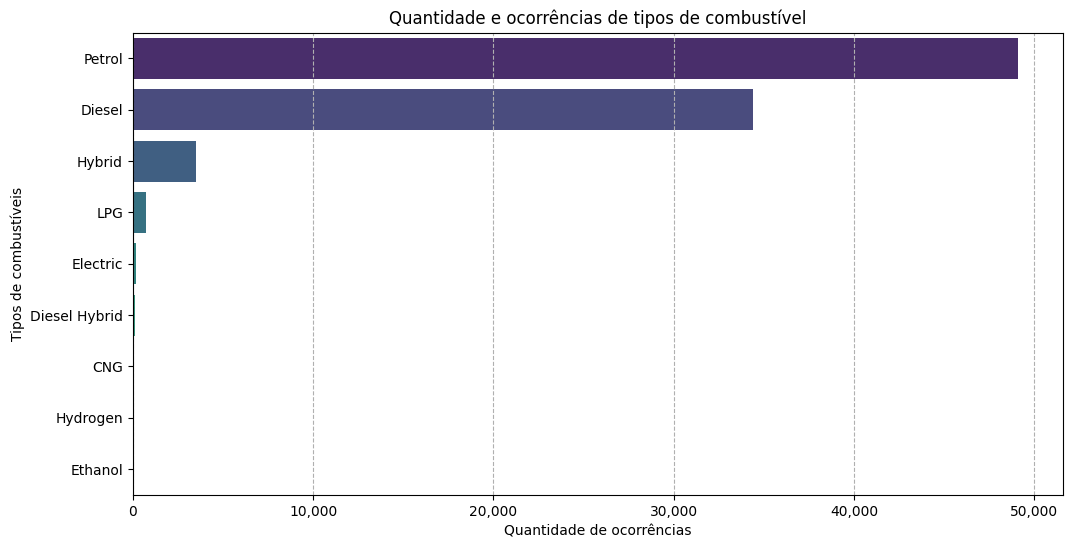

In [35]:
# Removendo linha com tipo de câmbio 'Unknown' ou 'Order'
dataset = dataset[(dataset['fuel_type'] != 'Unknown') & (dataset['fuel_type'] != 'Order')]

# Remover linhas com valores ausentes na coluna 'year'
dataset = dataset[dataset['year'].notna()]

# Convertendo a coluna 'year' para float para lidar com valores não inteiros
dataset['year'] = dataset['year'].astype(float)

# Filtrar o dataset para incluir apenas os anos de 1995 a 2023
filtered_dataset = dataset.copy()  # Criando uma cópia do dataset
filtered_dataset = filtered_dataset[(filtered_dataset['year'] >= 1995) & (filtered_dataset['year'] <= 2023)]

# Convertendo a coluna 'year' de volta para string
filtered_dataset['year'] = filtered_dataset['year'].astype(str)

# Ordenar o dataset pelo ano de fabricação em ordem crescente
filtered_dataset = filtered_dataset.sort_values(by='year')

# Contagem de ocorrências de cada tipo de combustível
fuel_counts = filtered_dataset['fuel_type'].value_counts()

# Ordenar os modelos de combustíveis em ordem decrescente
fuel_counts = fuel_counts.sort_values(ascending=False)

# Criando o gráfico de barras dos tipos de combustível utilizado
plt.figure(figsize=(12, 6))
sns.barplot(x=fuel_counts.values, y=fuel_counts.index, hue=fuel_counts.index, palette='viridis', legend=False)  # Adicionando hue para evitar FutureWarning

plt.title('Quantidade e ocorrências de tipos de combustível')
plt.xlabel('Quantidade de ocorrências')
plt.ylabel('Tipos de combustíveis')

# Adicionando um "." nos números de quantidade de vezes
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(axis='x', linestyle='--')  # Configurando o estilo da linha como tracejado
plt.show()

In [ ]:
# Filtrando todos os anos do dataset
yearsToFilter = dataset['year'].unique()[:28]

print(yearsToFilter)

['2023' '2018' '2009' '2019' '2012' '2022' '2016' '2005' '1999' '2015'
 '2004' '2020' '2021' '2011' '2017' '2010' '2013' '2014' '2007' '2003'
 '2008' '2001' '1998' '2002' '2006' '1997' '2000' '1996']


In [ ]:
# Converter a coluna 'price_in_euro' para tipo numérico (float)
dataset['price_in_euro'] = pd.to_numeric(dataset['price_in_euro'], errors='coerce')

# Remover linhas com valores NaN (valores não numéricos)
dataset = dataset.dropna(subset=['price_in_euro'])

# Agrupar o dataframe pela marca e calcular a média dos preços em euros para cada marca
preco_medio_marca = dataset.groupby('brand')['price_in_euro'].mean()

# Exibir a média de preços por marca
print("Preço Médio por Marca:")
print(preco_medio_marca)

Preço Médio por Marca:
brand
alfa-romeo       30637.627890
aston-martin    167550.737557
audi             27468.809759
bentley         202170.272500
bmw              23720.305235
cadillac         41404.966387
chevrolet        39176.460177
chrysler         71368.333333
citroen          18106.704552
dacia            14987.876531
daewoo            1833.442308
daihatsu          3967.788889
dodge            65449.291815
ferrari         284164.156442
fiat             15167.621504
ford             19699.762376
honda            24330.322963
hyundai          19385.126025
infiniti         22213.348837
isuzu            39008.250000
jaguar           44993.444813
jeep             35766.214740
kia              22017.957585
lada             12721.889571
lamborghini     387261.453237
lancia            7135.968750
land-rover       58255.092492
maserati         77234.399312
mazda            17246.551607
Name: price_in_euro, dtype: float64


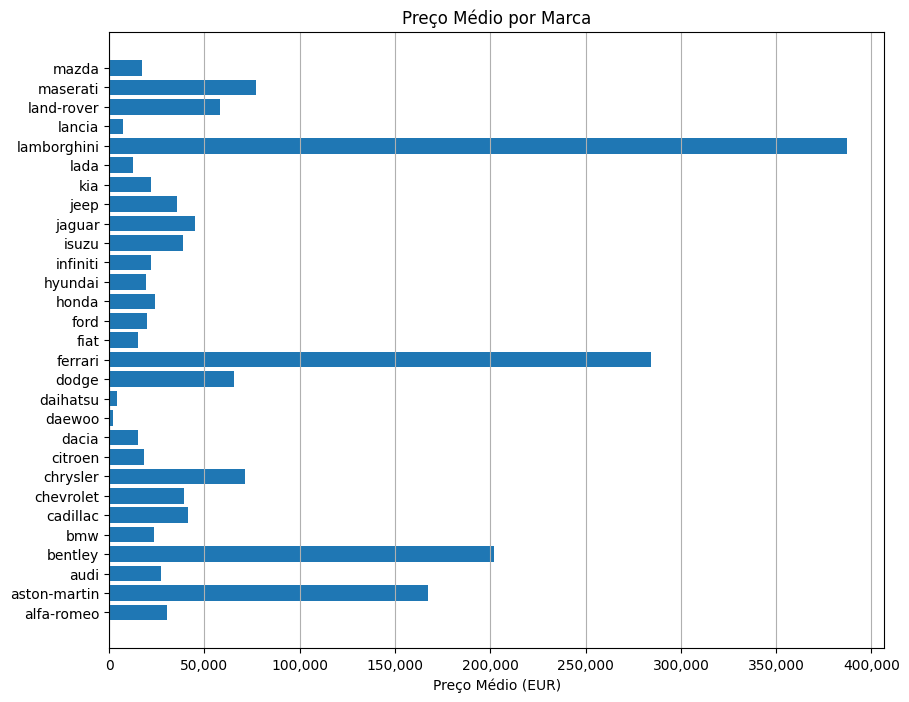

In [ ]:
# Converter a coluna 'price_in_euro' para tipo numérico (float)
dataset['price_in_euro'] = pd.to_numeric(dataset['price_in_euro'], errors='coerce')

# Remover linhas com valores NaN (valores não numéricos)
dataset = dataset.dropna(subset=['price_in_euro'])

# Agrupar o dataframe pela marca e calcular a média dos preços em euros para cada marca
preco_medio_marca = dataset.groupby('brand')['price_in_euro'].mean()

# Criar uma figura para o gráfico com tamanho personalizado (largura: 10, altura: 8)
plt.figure(figsize=(10, 8))

# Criar um gráfico de barras horizontais para representar o preço médio por marca
plot = plt.barh(preco_medio_marca.index, preco_medio_marca)

# Definir o rótulo do eixo x como 'Preço Médio (EUR)'
plt.xlabel('Preço Médio (EUR)')

# Definir o título do gráfico como 'Preço Médio por Marca'
plt.title('Preço Médio por Marca')

# Adicionando um "." nos números de quantidade de vezes
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(axis='x', linestyle='-')  # Configurando o estilo da linha como tracejado
plt.show()

In [ ]:
# Filtrar o dataframe para incluir apenas os registros com tipos de combustível específicos
ice_dataset = dataset[dataset['fuel_type'].isin(['Petrol', 'Diesel', 'Hybrid', 'Diesel Hybrid'])]

# Calcular a eficiência média de consumo de combustível para cada marca
brand_efficiency = ice_dataset.groupby('brand')['fuel_consumption_l_100km'].mean()

print(brand_efficiency)

brand
alfa-romeo       6.950337
aston-martin    13.400000
audi             6.286225
bentley         13.021212
bmw              6.332825
cadillac        10.188136
chevrolet        9.493694
chrysler         8.976471
citroen          5.127441
dacia            5.668330
daewoo           7.168627
daihatsu         5.788333
dodge           13.284472
ferrari         13.821003
fiat             5.315593
ford             5.960376
honda            5.689355
hyundai          5.774359
infiniti         8.036471
isuzu            7.675000
jaguar           6.993838
jeep             6.386158
kia              5.623843
lada             9.213750
lamborghini     14.808727
lancia           7.240426
land-rover       7.170302
maserati        11.201916
mazda            5.880098
Name: fuel_consumption_l_100km, dtype: float64


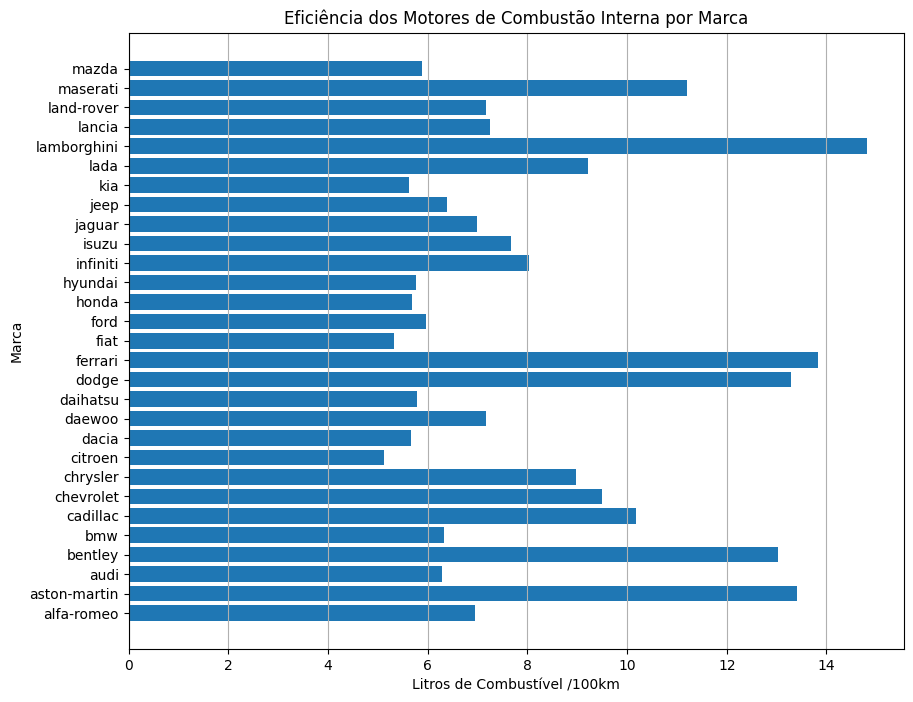

In [ ]:
# Filtrar o dataframe para incluir apenas os registros com tipos de combustível específicos
ice_dataset = dataset[dataset['fuel_type'].isin(['Petrol', 'Diesel', 'Hybrid', 'Diesel Hybrid'])]

# Calcular a eficiência média de consumo de combustível para cada marca
brand_efficiency = ice_dataset.groupby('brand')['fuel_consumption_l_100km'].mean()

# Criar uma figura para o gráfico com tamanho personalizado (largura: 10, altura: 8)
plt.figure(figsize=(10, 8))

# Criar um gráfico de barras horizontais para representar a eficiência média por marca
plot = plt.barh(brand_efficiency.index, [brand_efficiency.loc[i] for i in brand_efficiency.index])

# Definir o rótulo do eixo x como 'Litros de Combustível por 100km'
plt.xlabel('Litros de Combustível /100km')

# Definir o rótulo do eixo y como 'Marca'
plt.ylabel('Marca')

# Definir o título do gráfico como 'Eficiência dos Motores de Combustão Interna por Marca'
plt.title('Eficiência dos Motores de Combustão Interna por Marca')

plt.grid(axis='x', linestyle='-')  # Configurando o estilo da linha como reta
plt.show()

In [ ]:
# Calcular a média de quilometragem para cada marca de veículo
quilometragem_media_marca = dataset.groupby('brand')['mileage_in_km'].mean()

print(quilometragem_media_marca)

brand
alfa-romeo       72169.288591
aston-martin     27525.597285
audi            111364.603030
bentley          35960.255000
bmw             131505.151048
cadillac         61452.050420
chevrolet        56262.194690
chrysler          7228.833333
citroen          67524.849812
dacia            49102.457795
daewoo          145807.442308
daihatsu        123089.755556
dodge            33406.708185
ferrari          24125.392638
fiat             48255.960110
ford             83373.500537
honda            52777.192593
hyundai          57905.149761
infiniti        103672.418605
isuzu            41237.108974
jaguar           48342.521992
jeep             41243.805591
kia              50331.431841
lada             34212.889571
lamborghini      20843.906475
lancia          146014.135417
land-rover       58861.197679
maserati         48633.882960
mazda            85202.855404
Name: mileage_in_km, dtype: float64


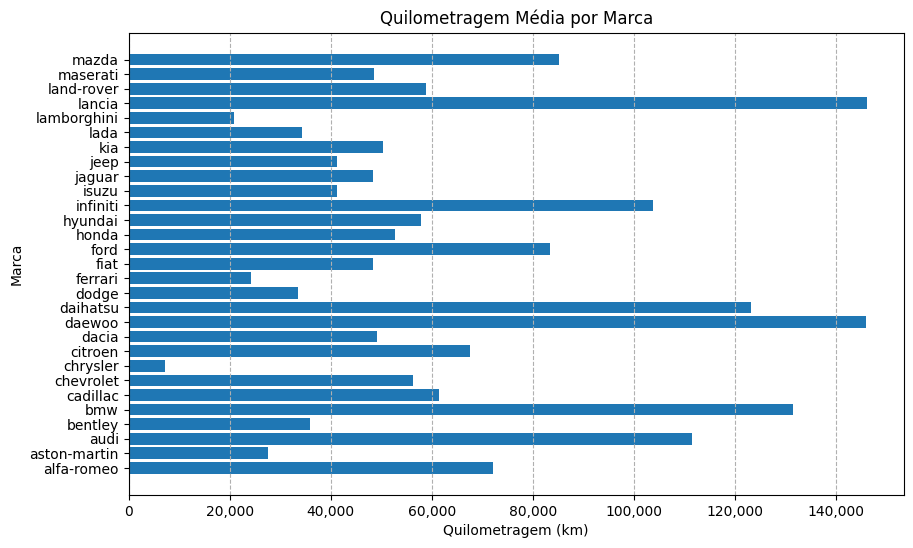

In [ ]:
# Calcular a média de quilometragem para cada marca de veículo
quilometragem_media_marca = dataset.groupby('brand')['mileage_in_km'].mean()

# Criar uma figura para o gráfico com tamanho personalizado
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras horizontais para representar a quilometragem média por marca
plot4 = plt.barh(quilometragem_media_marca.index, [quilometragem_media_marca.loc[i] for i in quilometragem_media_marca.index])

# Definir o rótulo do eixo x como 'Quilometragem (km)'
plt.xlabel('Quilometragem (km)')

# Definir o rótulo do eixo y como 'Marca'
plt.ylabel('Marca')

# Definir o título do gráfico como 'Quilometragem Média por Marca'
plt.title('Quilometragem Média por Marca')

# Adicionando um "." nos números de quantidade de vezes
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(axis='x', linestyle='--')  # Configurando o estilo da linha como tracejado
plt.show()

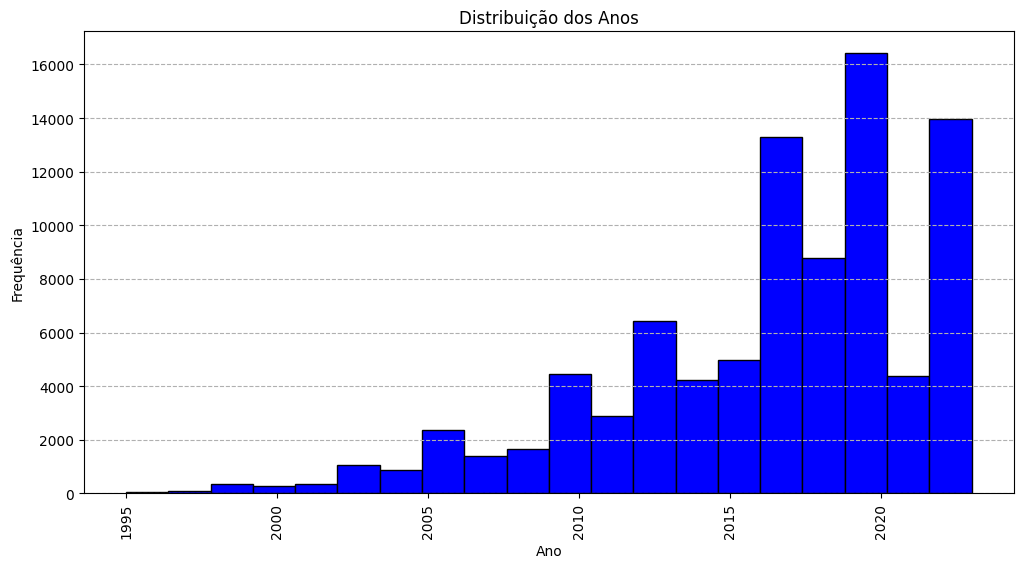

In [25]:
# Distribuição dos anos com frequência
plt.figure(figsize=(12, 6))
plt.hist(dataset['year'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.title('Distribuição dos Anos')
plt.xticks(rotation=90)

# Configurando a grade para mostrar apenas linhas verticais
plt.grid(axis='y', linestyle='--')  # Configurar o estilo da linha como tracejado
plt.show()

In [ ]:
# Agrupa o dataframe pelos anos e calcula a média dos preços em euros para cada ano
preco_medio_ano = dataset.groupby('year')['price_in_euro'].mean()

# exibir preços
print(preco_medio_ano)

year
1995    18821.363636
1996    39868.400000
1997    12528.193182
1998    13444.421053
1999     9982.726415
2000    13985.738806
2001    11666.498534
2002    10466.203747
2003     7761.776000
2004     6919.740957
2005     7401.077369
2006     7980.641524
2007     9769.810557
2008    11116.739521
2009     9383.279579
2010    11687.616682
2011    13292.207133
2012    14961.991943
2013    16098.060968
2014    17456.529329
2015    20825.347476
2016    22185.348473
2017    24880.802205
2018    28522.397215
2019    31331.241571
2020    37802.302054
2021    45853.897260
2022    51934.704356
2023    46996.452448
Name: price_in_euro, dtype: float64


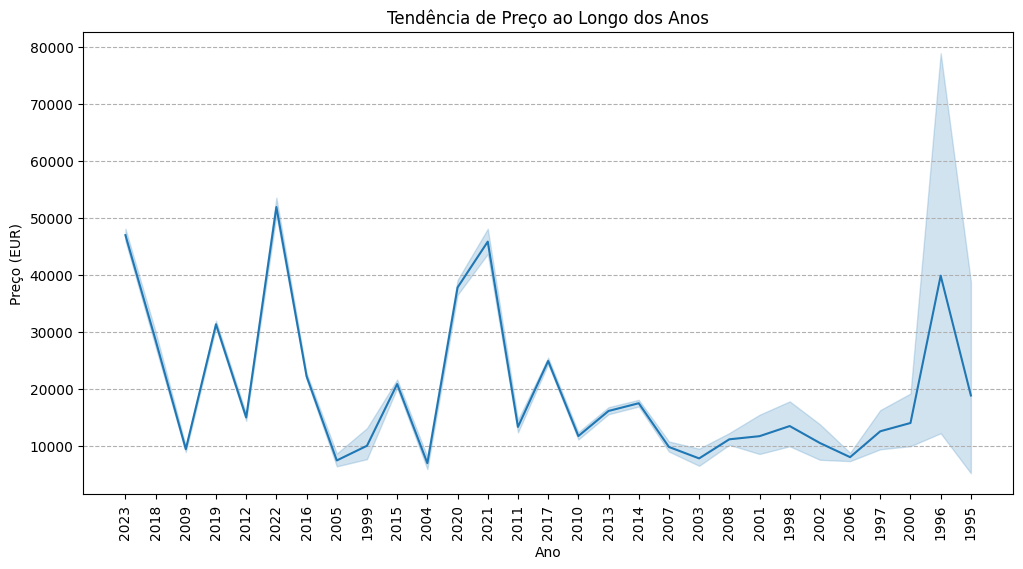

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Cria o gráfico de linha
sns.lineplot(x='year', y='price_in_euro', data=dataset)

# Adiciona rótulos aos eixos x e y
plt.xlabel('Ano')
plt.ylabel('Preço (EUR)')

# Define o título do gráfico
plt.title('Tendência de Preço ao Longo dos Anos')

# Rotaciona os rótulos do eixo x em 90 graus para melhor visualização
plt.xticks(rotation=90)

# Configurando a grade para mostrar apenas linhas verticais
plt.grid(axis='y', linestyle='--')  # Configurar o estilo da linha como tracejado
plt.show()

In [ ]:
# Modelos dos carros e vezes que eles aparecem
dataset.model.value_counts()[:60]

model
Ford Focus                       3508
Audi A3                          3318
Audi A4                          3207
Audi A6                          2685
Ford Fiesta                      2567
Ford Kuga                        2064
BMW 320                          1867
Audi A5                          1638
Fiat 500                         1463
Hyundai i30                      1455
Audi A1                          1291
Kia Sportage                     1189
Hyundai TUCSON                   1183
Audi Q3                          1105
BMW X1                           1102
Ford Mondeo                      1035
BMW 118                          1031
Dacia Sandero                    1025
Audi Q5                          1024
BMW 530                          1008
Dacia Duster                     1005
BMW 318                          1000
BMW 520                           985
BMW X3                            900
Ford EcoSport                     810
BMW 116                           799
Ford S

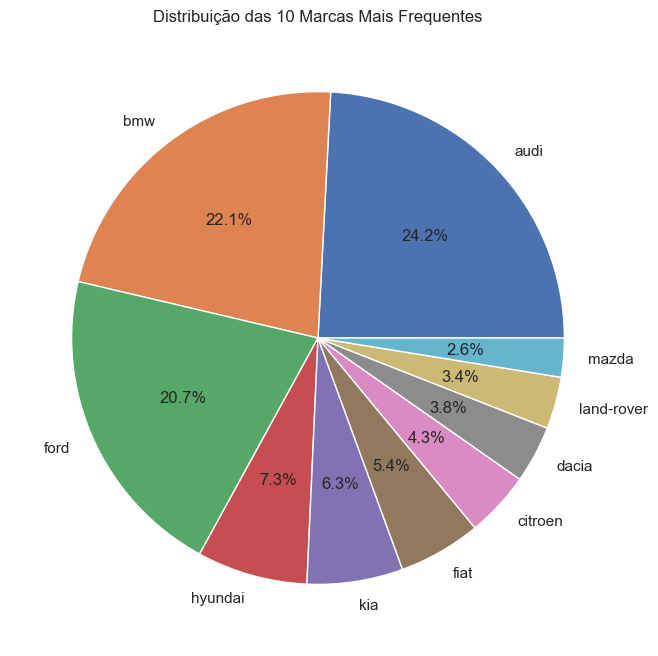

In [ ]:
# Contagem de marcas
brand_counts = dataset['brand'].value_counts()

# Selecionando as 10 marcas mais frequentes
top_10_brands = brand_counts.head(10)

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct="%1.1f%%")
plt.title('Distribuição das 10 Marcas Mais Frequentes')
plt.show()

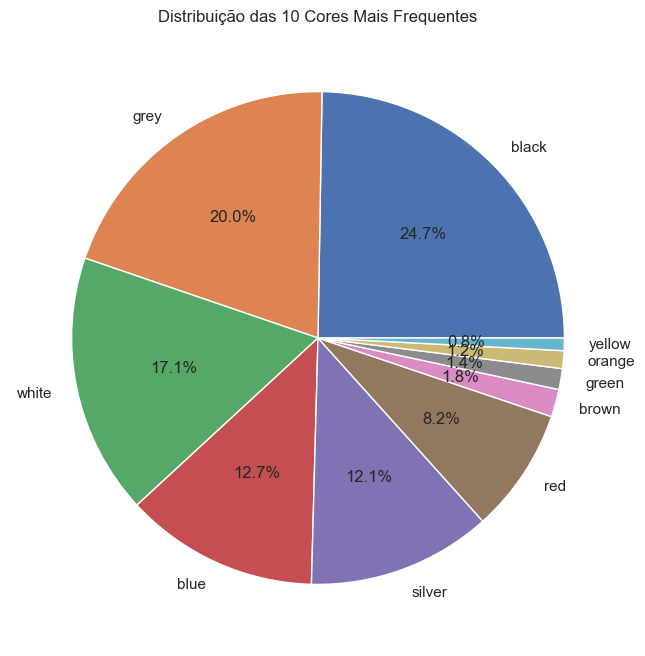

In [ ]:
# Contagem de cores
color_counts = dataset['color'].value_counts()

# Selecionando as 10 cores mais frequentes
top_10_colors = color_counts.head(10)

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(top_10_colors, labels=top_10_colors.index, autopct="%1.1f%%")
plt.title('Distribuição das 10 Cores Mais Frequentes')
plt.show()

## Desconsiderar, somente testes da biblioteca prophet

C:\Users\BIBOY\AppData\Local\Temp\ipykernel_29092\797616340.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['registration_date'] = pd.to_datetime(data['registration_date'], errors='coerce')
01:28:15 - cmdstanpy - INFO - Chain [1] start processing
01:28:38 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\BIBOY\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\BIBOY\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, i

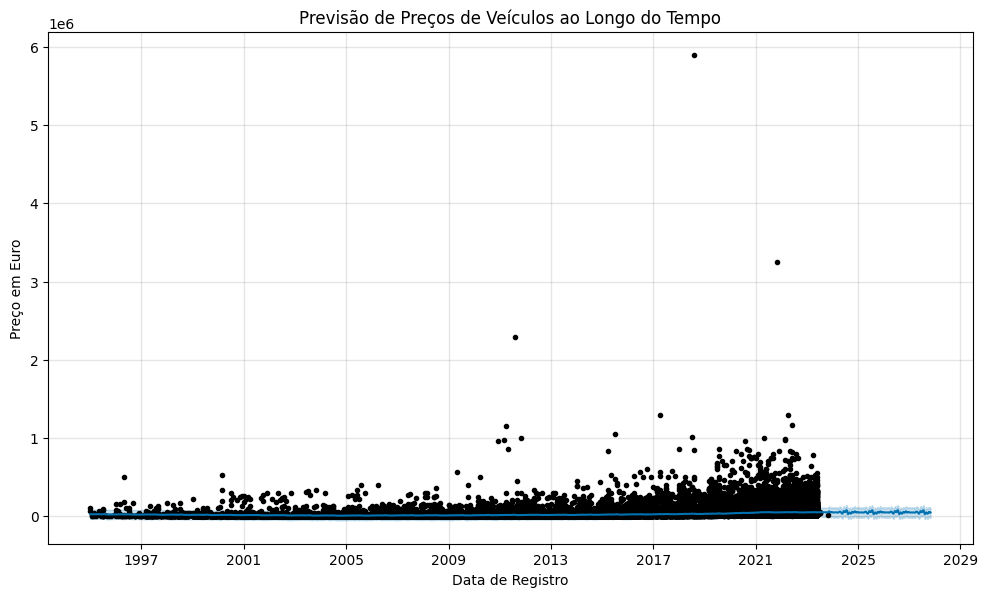

In [34]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('gcar_data.csv')

# Converter a coluna de datas para o formato adequado
data['registration_date'] = pd.to_datetime(data['registration_date'], errors='coerce')

# Converter a coluna de preços para float
data['price_in_euro'] = pd.to_numeric(data['price_in_euro'], errors='coerce')

# Criar um novo DataFrame apenas com as colunas relevantes
df = data[['registration_date', 'price_in_euro']]

# Renomear as colunas conforme necessário para o Prophet
df = df.rename(columns={'registration_date': 'ds', 'price_in_euro': 'y'})

# Criar um modelo Prophet
model = Prophet()

# Ajustar o modelo aos dados
model.fit(df)

# Gerar datas futuras para previsão
future_dates = model.make_future_dataframe(periods=1460)

# Fazer previsões
forecast = model.predict(future_dates)

# Plotar os resultados
model.plot(forecast, xlabel='Data de Registro', ylabel='Preço em Euro')
plt.title('Previsão de Preços de Veículos ao Longo do Tempo')
plt.show()

01:27:46 - cmdstanpy - INFO - Chain [1] start processing
01:28:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\BIBOY\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\BIBOY\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\BIBOY\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: T

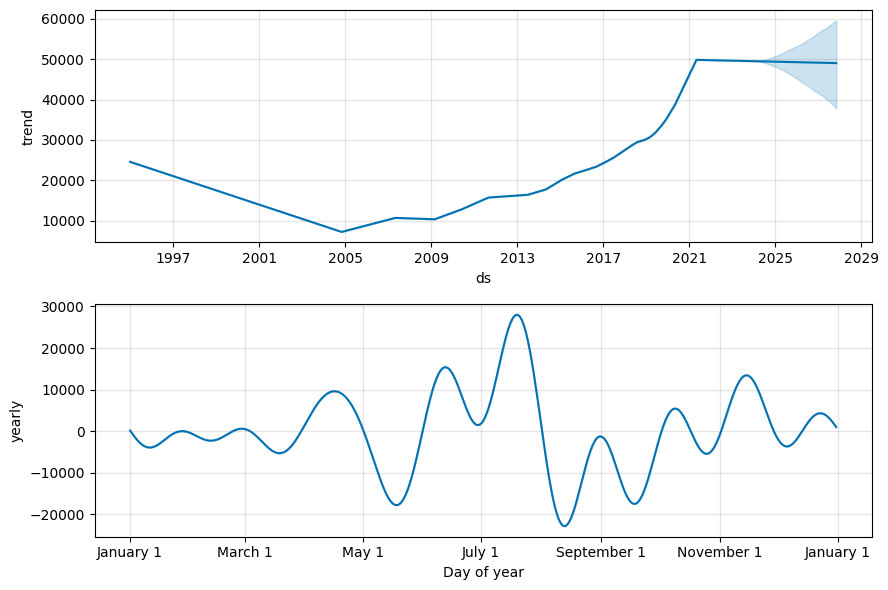

In [33]:
# Converter a coluna de datas para o formato adequado
data['registration_date'] = pd.to_datetime(data['registration_date'])

# Converter a coluna de preços para float
data['price_in_euro'] = pd.to_numeric(data['price_in_euro'], errors='coerce')

# Criar um novo DataFrame apenas com as colunas relevantes
df = data[['registration_date', 'price_in_euro']]

# Renomear as colunas conforme necessário para o Prophet
df = df.rename(columns={'registration_date': 'ds', 'price_in_euro': 'y'})

# Criar um modelo Prophet
model = Prophet()

# Ajustar o modelo aos dados
model.fit(df)

# Gerar datas futuras para previsão
future_dates = model.make_future_dataframe(periods=1460)

# Fazer previsões
forecast = model.predict(future_dates)

# Plotar os resultados

# 1. Componentes do Modelo Prophet
model.plot_components(forecast)
plt.show()

01:27:04 - cmdstanpy - INFO - Chain [1] start processing
01:27:25 - cmdstanpy - INFO - Chain [1] done processing


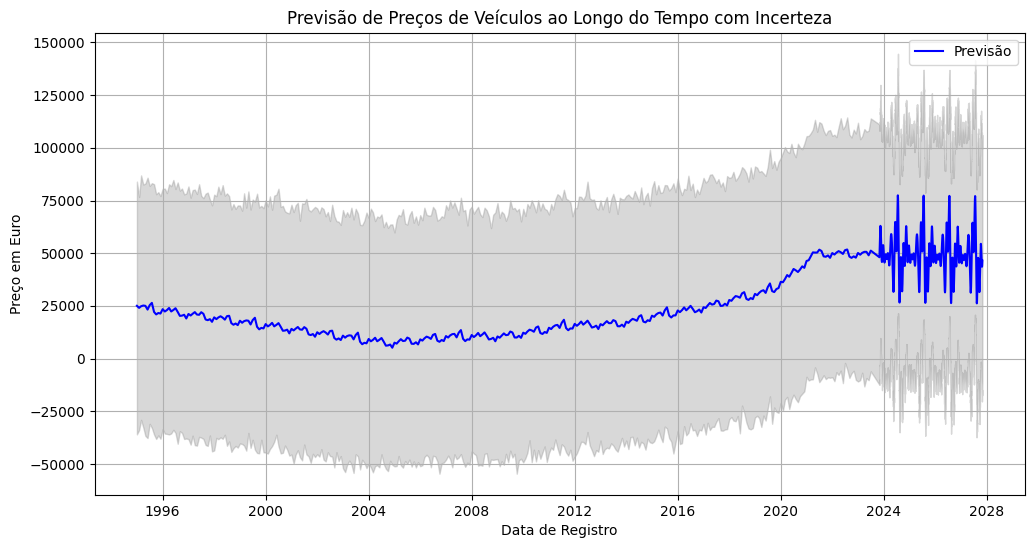

In [32]:
# Converter a coluna de datas para o formato adequado
data['registration_date'] = pd.to_datetime(data['registration_date'])

# Converter a coluna de preços para float
data['price_in_euro'] = pd.to_numeric(data['price_in_euro'], errors='coerce')

# Criar um novo DataFrame apenas com as colunas relevantes
df = data[['registration_date', 'price_in_euro']]

# Renomear as colunas conforme necessário para o Prophet
df = df.rename(columns={'registration_date': 'ds', 'price_in_euro': 'y'})

# Criar um modelo Prophet
model = Prophet()

# Ajustar o modelo aos dados
model.fit(df)

# Gerando datas futuras para previsão
future_dates = model.make_future_dataframe(periods=1460)

# Fazendo previsões
forecast = model.predict(future_dates)

# Plotando os resultados

# Gráfico de Incerteza nas Previsões
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Previsão', color='b')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Previsão de Preços de Veículos ao Longo do Tempo com Incerteza')
plt.xlabel('Data de Registro')
plt.ylabel('Preço em Euro')
plt.legend()
plt.grid(True)
plt.show()